#  Keras - Нейронные сети. 1. Основы

## Напоминалка

<img src="nn_all.png" style="width:800px"> 

## Модельные данные
Рассмотрим 2-мерное пространство признаков $\{x_1,x_2\}$ внутри единичного квадрата $[0...1]^2$ и два класса. Объекты одного класса ($y=1$) находятся внутри круга, а второго ($y=0$) - вне него.

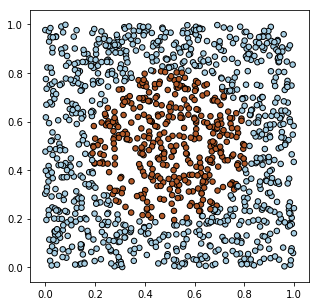

x: (1200, 2) y: (1200,)
примеров: [827 373]


In [2]:
import numpy as np                       # работа с массивами
import matplotlib.pyplot as plt          # постороение графиков
import time                              # время вычислений

np.random.seed(1)                        # Создаём данные с двумя признаками:
x_dat = np.random.rand(1200, 2)          # 1200 случайных чисел [0..1]^2
y_dat = np.sum((x_dat-0.5)**2, axis=1) < 0.1

plt.subplots(figsize=(5, 5))             # размеры картинки (квадрат)
plt.scatter(x_dat[:,0], x_dat[:,1], s=30, c=y_dat, 
            cmap=plt.cm.Paired, edgecolors='k')        
plt.show()                               # выводим рисунок    

print('x:',x_dat.shape, 'y:',y_dat.shape)# размерности массивов
print("примеров:", np.bincount(y_dat))   # количество разный целых чисел

<b style="color:green">(!)</b> размерность `(n,1)` не тоже, что `(n,)`:

In [3]:
print(np.array( [1, 2, 3, 4]      ).shape)
print(np.array( [[1],[2],[3],[4]] ).shape)
print(np.array( [[1,2], [3,4]]    ).shape)

(4,)
(4, 1)
(2, 2)


## Разбиваем на обучающие и проверочные данные

In [4]:
n_lrn = round(len(y_dat)*0.75)               # число данных для обучения (90%)

x_lrn = x_dat[:n_lrn]; y_lrn = y_dat[:n_lrn] # разбиваем на данные для обучения
x_val = x_dat[n_lrn:]; y_val = y_dat[n_lrn:] # и проверочные (валидационные)

print('lrn:',x_lrn.shape, y_lrn.shape)
print('val:',x_val.shape, y_val.shape)

lrn: (900, 2) (900,)
val: (300, 2) (300,)


## Создаём нейронную сеть

<img src="nn_3_1.png" style="width:200px; float:left; margin-right:50px;"> 
**Keras** — открытая нейросетевая библиотека, написанная на языке Python.<br> 
Она является надстройкой над фреймворками TensorFlow, Theano и Deeplearning4j.

Зададим сеть с двумя входами, одним скрытым слоем с 3-я нейронами и одним выходным нейроном, дающим "вероятность" класса $y=1$ (сигмоид = $[0...1]$)



In [6]:
from   keras.models     import Sequential   # способ формирования слоёв (стопка)
from   keras.layers     import Dense        # полносвязный слой
from   keras            import backend as K # доступ к настройкам

Using TensorFlow backend.


In [12]:
K.clear_session()                           # сброс номеров имён слоёв

model = Sequential()                        # линейная стопка слоёв

model.add(Dense(3, activation='sigmoid',  input_dim=2)) # первый скрытый c 2-я входами
model.add(Dense(1, activation='sigmoid'))               # выходной слой

model.summary()                             # описание слоёв

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Явное определение активационных слоёв
Полносвязный слой `Dense` - это линейная функция $y=b+\sum_{i}\omega_{i} x_i$ (расстояние до гиперплоскости). Если для этого слоя не указывают `activation`, то за ним необходимо добавить нелинейную функцию активации:

In [14]:
from   keras.layers import Activation       # активационный слой
K.clear_session() 
model = Sequential()                        # линейная стопка слоёв

model.add(Dense(3, input_dim=2))            # первый скрытый
model.add(Activation('sigmoid'))            # активационные функции
model.add(Dense(1))                         # выходной слой
model.add(Activation('sigmoid'))            # активационная функция

model.summary()                             # описание слоёв

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Активационные функции:<br>
`sigmoid`, `relu`, `softmax`, `elu`, `selu`, `softplus`, `softsign`, `tanh`, `hard_sigmoid`

## Функциональное задание сети
Если архитектура сети не является линейной стопкой слоёв, используют функциональую форму задания её структуры.

In [15]:
from   keras.models     import Model        # для функционального способа
from   keras.layers     import Input        # входной слой

inp = Input( shape=(2,) )                   # 2 входа сети
den = Dense(3, activation='sigmoid')(inp)   # скрытый слой  3 нейрона
out = Dense(1, activation='sigmoid')(den)   # выходной слой 1 нейрон

model = Model(inputs=inp, outputs=out)      # создаём модель

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Визуализация архитектуры

Cтруктурная диаграмма keras может быть выведена как svg-картинка в ноутбуке или сохранена в png файле (см keras.io/visualization/). 

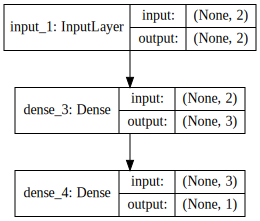

In [16]:
import os   # Для устранения ошибки, надо поставить graphviz c www.graphviz.org
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

gv = model_to_dot(model, show_shapes=True)  # граф библиотеки graphviz
SVG(gv.create(prog='dot', format='svg'))    # рисуем как svg

## Компилируем модель
После определения архитектуры сети, модель компилируют,
сообщая какую  ошибку она должна минимизировать и при помощи какого метода это делать:

In [18]:
from keras.optimizers import SGD

model.compile(loss      = 'binary_crossentropy',   # функция ошибок 
              optimizer = SGD(lr=1, momentum=0.8), # метод её оптимизации
              metrics   = ['accuracy'])            # вычисл.метрики

Compile defines the loss function, the optimizer and the metrics. That's all.<br>
It has <b>nothing to do with the weights</b>.<br> If you compile a model again, you will lose the optimizer states.

## Обучение в консоле
После компиляции модели, при помощи `model.fit` запускаем обучение с параметрами:
* `batch_size` - примеров для усреднения градиента
* `epochs` - сколько раз пропускаем все данные
* `verbose` -  детальность вывода информации (0,1,2)
* `shuffle` - перемешивать ли данные перед каждой эпохе (True по умолчанию)

In [25]:
%%time

model.fit(x_lrn, y_lrn, validation_data=(x_val, y_val),
         batch_size = 50, epochs = 3,  verbose = 2 )

Train on 900 samples, validate on 300 samples
Epoch 1/3
 - 0s - loss: 0.6033 - acc: 0.7089 - val_loss: 0.6701 - val_acc: 0.6300
Epoch 2/3
 - 0s - loss: 0.6105 - acc: 0.7089 - val_loss: 0.6812 - val_acc: 0.6300
Epoch 3/3
 - 0s - loss: 0.6022 - acc: 0.7089 - val_loss: 0.6804 - val_acc: 0.6300
Wall time: 63.2 ms


<b>loss</b> - ошибка, <b>acc</b> - доля правильно классифицированных обучающих данных<br>
<b>val_loss</b>, <b>val_acc</b> - тоже для тестовых данных (validation)

## Делаем предсказания

`model.predict(x)` возвращает значения выходов для входов x.<br> Хотя выход и один, результатом `predict` будет 2-мерный массив!

In [23]:
%%time
y_res = model.predict(x_val)         # результаты работы сети
print(y_res.shape)                   # их размерность [ [0.1],[0.9],...]
y_res = y_res[:,0]                   # меняем размерность
print(y_res.shape)                   # их размерность [ 0.1, 0.9,...]
y_res = y_res > 0.5                  # переводим в номер класса

print("val_acc:", np.mean(y_res == y_val))   

(300, 1)
(300,)
val_acc: 0.63
Wall time: 5.01 ms


## Функции ошибок
* Для сети с одним выходом ($y$ - целевое значение выхода, $\hat{y}$ - реальное): 
$$
\mathrm{mean\_squared\_error}=\frac{1}{N}\sum^N_{i=1} \bigr(y_i-\hat{y}_i\bigr)^2,~~~~~~~
\mathrm{mean\_absolute\_error}=\frac{1}{N}\sum^N_{i=1} \bigr|y_i-\hat{y}_i\bigr|
$$
$$
\mathrm{binary\_crossentropy} = -\frac{1}{N}\sum^N_{i=1} \bigr[y_i\ln \hat{y}_i+(1-y_i)\ln (1-\hat{y}_i)\bigr]
$$

* Для $K$ категорий имеем $K$ выходов.<br>
Если классы однозначны, для первого класса целевая вероятность $p_{ik}=(1,0,...,0)$ и т.д.<br> 
$$
\mathrm{categorical\_crossentropy} = -\frac{1}{N}\sum^N_{i=1}\sum^K_{k=1} p_{ik} \ln \hat{p}_{ik}
$$
Для такой функции ошибок активационная функция выходного слоя:
$$
\mathrm{softmax} = \frac{e^{y_i}}{\displaystyle \sum^K_{k=1} e^{y_k}}
$$

In [24]:
y_res = model.predict(x_val)[:,0]  # результаты работы сети

print( "val_loss=%.4f" % 
      ( -np.mean( y_val*np.log(y_res) + (1-y_val)*np.log(1-y_res) )) )     

val_loss=0.6861


При обучении `loss` и `acc` по тренировочным данным усредняются внутри эпохи по `batch`-ам в процессе обучения, поэтому в начале обучения `loss` может быть больше, чем `val_loss`.

## Визуализация обучения

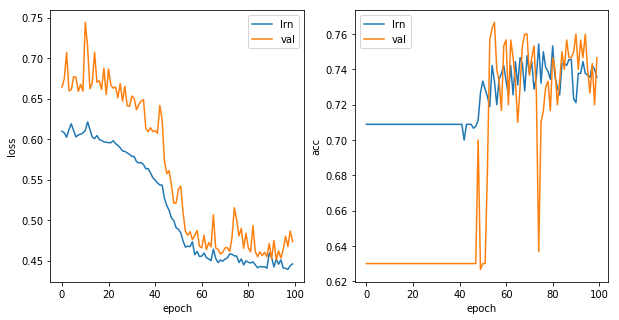

In [26]:
model = Sequential()
model.add(Dense(3, activation='sigmoid',  input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'],
              optimizer = SGD(lr=1, momentum=0.8))
                         
res = model.fit(x_lrn, y_lrn, validation_data=(x_val, y_val),
                batch_size = 100, epochs = 100,  verbose=0)

#------------------------------------------------------------------------
plt.subplots(1,2, figsize=(10, 5) );          # вывод полной истории обучения

plt.subplot (1, 2, 1);                        # два графика в одной строке
plt.plot(res.history['loss'])                 # первый график (ошибка)
plt.plot(res.history['val_loss'])
plt.ylabel('loss'); plt.xlabel('epoch')
plt.legend(['lrn', 'val'], loc='best')

plt.subplot (1, 2, 2);                        # второй график (аккуратность)
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.ylabel('acc'); plt.xlabel('epoch')
plt.legend(['lrn', 'val'], loc='best')
plt.show()

## Использование callbacks
При помощи `callbacks` можно совершать действия в конце каждой эпохи.<br>
Мы будем рисовать графики и разделяющую поверхность.<br>
Сначала запусти <a href="#plot_losses">ячейку</a> в конце ноутбука, для задания `plot_losses`!

In [28]:
model = Sequential()
model.add(Dense(3, activation='sigmoid',  input_dim=2))
model.add(Dense(1, activation='sigmoid'))



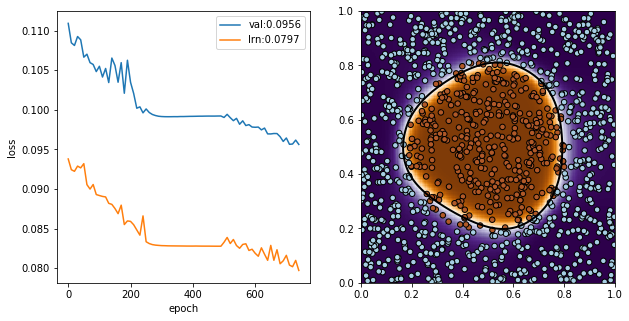

In [33]:
model.compile(loss='binary_crossentropy',  metrics=['accuracy'],
              optimizer = SGD(lr=0.1, momentum=0.8))

#K.set_value(model.optimizer.lr, 1)          # меняем скорость обучения

plot_losses.reset = False

model.fit(x_lrn, y_lrn, validation_data=(x_val, y_val),
          batch_size = 100, epochs = 250,  verbose=0, 
          callbacks=[plot_losses])

## Сохранение лучшей модели
В процессе обучения можно сохранять модель в файле (вместе с весами) при достижении лучших показателей (ниже по критерию val_acc - параметр monitor)

In [34]:
%%time
from keras.callbacks import ModelCheckpoint

fname = "m_3D"    # имя файла для сохранения

model.fit(x_lrn, y_lrn, validation_data=(x_val, y_val),
          batch_size=50, epochs=3,  verbose=0,
          callbacks=[ModelCheckpoint(fname,                # имя файла
                                     monitor='val_acc',    # за чем следим
                                     verbose=1, save_best_only=True)])


Epoch 00001: val_acc improved from -inf to 0.97333, saving model to m_3D

Epoch 00002: val_acc did not improve

Epoch 00003: val_acc did not improve
Wall time: 114 ms


## Загрузка и валидация

In [35]:
from keras.models import load_model

model = load_model(fname)       # загружаем сеть из файла

score = model.evaluate(x_val, y_val, verbose=0)
print('\nloss: %.4f, acc: %.4f' % (score[0], score[1]) )


loss: 0.0953, acc: 0.9733


## Матрица ошибок
При помощи sklearn можно вывести матрицу предсказаний. Так как класса 2 - матрица 2x2.<br>
Слева `y_val`, сверху `y_res`.
На диагонали стоит число правильных примеров. Остальные ячейки - ошибки.

In [36]:
y_res = model.predict(x_val)  # делаем предсказания для всех тестов
y_res = (y_res[:,0] > 0.5)    # переводим их в номер класса (0,1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_res)
print("Матрица ошибок:\n",cm)

Матрица ошибок:
 [[188   1]
 [  7 104]]


## ROC - кривая

Когда примеров одного класса существенно больше чем второго, простая частота "угадывания" - плохая мера качеста модели. В этом случае лучше использовать площадь под roc-кривой.

Матрица ошибок зависит от порога выбора класса. Выше $y > 0.5$.<br> Если $y > 0.4$ будет больше второго класса, а если $y > 0.6$ - первого. 

<table>
<tr><td>  </td><td>0</td><td>1</td></tr>
<tr><td>0</td><th>TN</th><th>FP</th></tr>
<tr><td>1</td><th>FN</th><th>TP</th></tr>
</table>   

Два отношения качества распознавания  позитивного ($y=1$) класса:

$$\mathbf{TPR}= \frac{\mathbf{TP}}{\mathbf{FN}+\mathbf{TP}}  ~~(\max),~~~~~~ \mathbf{FPR}= \frac{\mathbf{FP}}{\mathbf{TN}+\mathbf{FP}}  ~~(\min)$$ 



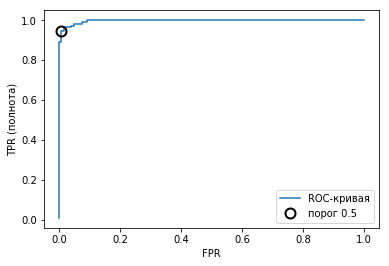

auc: 0.997187663854


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score 

fpr, tpr, thresholds = roc_curve(y_val, model.predict(x_val)[:,0])

plt.plot(fpr, tpr, label="ROC-кривая") 
plt.xlabel("FPR"); plt.ylabel("TPR (полнота)") 
close_05 = np.argmin(np.abs(thresholds-0.5)) 
plt.plot(fpr[close_05], tpr[close_05], 'o', markersize=10, 
         label="порог 0.5", fillstyle="none", c='k', mew=2) 
plt.legend(loc=4) 
plt.show()

print("auc:",roc_auc_score(y_val, model.predict(x_val)[:,0] ) )

## Получение весов
При создании модели, веса и смещения инициализируются:<br>
`zero`, `one`, `uniform` ($-0.05,0.05$), `normal` ($\mathrm{stddev}=0.05$), `truncated_normal`

In [39]:
from keras.initializers import RandomNormal
K.clear_session()                            # сброс номеров имён слоёв

model = Sequential()                         # линейная стопка слоёв
model.add(Dense(3, activation='sigmoid',     # первый скрытый
                kernel_initializer='uniform',# веса - равномерные сл.числа
                bias_initializer='zero',     # смещения равны нулю
                input_dim=2))                # слой имеет два входа

init = RandomNormal(mean=0.0, stddev=1)      # создаём инициализатор
model.add(Dense(1, activation='sigmoid',     # выходной нейрон
                kernel_initializer = init))  # инициализация его весов

layer = model.get_layer('dense_1')           # слой с именем dense_1

Можно "достучаться" до любого слоя модели и любого нейрона в нём, получив веса и смещения. Доступ к слою возможен по имени или по номеру в массиве layers.

In [40]:
w = layer.get_weights()[0]                  # веса
b = layer.get_weights()[1]                  # смещения

np.set_printoptions(precision=3, suppress=True)
print(w)
print(b)

#print(model.get_config())
#print(model.layers[1].get_config())
print(model.layers[0].get_weights()[0].shape)

[[-0.036  0.026  0.026]
 [ 0.034  0.025 -0.032]]
[ 0.  0.  0.]
(2, 3)


## Методы обучения

* `SGD` - стохастический градиентный спуск. Скорость обучения $\lambda=$ `lr`, степень инертности $\mu=$ `momentum`:

$$
\omega_{t+1} = \omega_t + \Delta \omega_{t+1},~~~~~~~~~
\Delta \omega_{t+1}  = \mu\cdot  \Delta \omega_t - \lambda\cdot\nabla E(\omega_t)
$$

* `SGD` с поправкой Нестерова `nesterov=True` (раз собрались сместиться на $ \mu\cdot  \Delta \omega_t$, там градиент и считаем)

$$
\omega_{t+1} = w_t + \Delta \omega_{t+1},~~~~~~~~~
\Delta \omega_{t+1}  = \mu\cdot  \Delta \omega_t - \lambda\cdot\nabla E(\omega_t+\mu\cdot  \Delta \omega_t)
$$

`SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)`<br>
`decay`: Learning rate decay over each update.

---

* `Adagrad` - адаптивный градиент. Если $\omega$ сильно дёргается, будем уменьшать скорость обучения.<br>
Для каждого  $\omega$ запоминаем сумму квадратов его обнавлений $G_t$:

$$
\Delta \omega_{t+1} = -\lambda \cdot \frac{g_t}{\sqrt{G_{t+1}+\epsilon}},~~~~~~~g_t=\nabla E(\omega_t),~~~~~~G_{t+1} = G_t + g^2_t
$$

`Adagrad(lr=0.01, decay=0.0, epsilon=None)`<br>

---

* `RMSprop` (root mean square propagation). В методе Adagrad $G_t$ увеличиваются со временем и сильно занижают скорость обучения. Вместо накопленной суммы можно использовать скользящее среднее квадратов:

$$
G_{t+1}=\rho\, G_t + (1-\rho)\,g^2_t
$$

`RMSprop(lr=0.001, rho=0.9, decay=0.0, epsilon=None)`

---

* `Adadelta` (2012) - модификация RMSprop

`Adadelta(lr=1.0, rho=0.95, decay=0.0, epsilon=None)`

---

* `Adam` (2014) - адаптивная оценка момента. Cочетает накопление движения и более слабое обновления сильно дёргающихся параметров. Вычисляем скользящее среднее градиента и его квадрата:

$$
\tilde{g}_{t} = \beta_1\cdot  \tilde{g}_{t-1} + (1-\beta_1)\cdot g_t
$$

$$
\tilde{G}_{t} = \beta_2\cdot  \tilde{G}_{t-1} + (1-\beta_2)\cdot g^2_t
$$

Калибруем их, увеличивая на начальных итерациях:

$$
\hat{g}_t = \frac{\tilde{g}_t}{1-\beta^t_1},~~~~~~~~~\hat{G}_t = \frac{\tilde{G}_t}{1-\beta^t_2}.
$$

(Если $g_0=G_0=0$ при $\beta_i\sim 1$ долгое время $\tilde{g}_{t},\tilde{G}_{t}\sim 0$.<br> В тоже время для $g_t=const$, имеем $\tilde{g}_t = (1-\beta_1)(1+\beta_1+\beta^2_1+...+\beta^{t-1}_1) g =(1-\beta^t_1)\,g$)

Подправляем веса:

$$
\Delta\omega_{t+1} = -\lambda \frac{\hat{g}_t}{\sqrt{\hat{G}_t+\epsilon}}
$$

`Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)`

---

* `Adamax` (2014) - модификация Adam в которой скользящее среднее квадратов заменяется на:

$$
\tilde{G}_{t} = \beta^p_2\cdot  \tilde{G}_{t-1} + (1-\beta^p_2)\cdot \bigr|g_t\bigr|^{\,p},~~~~~~G_{t} = \lim_{p\to\infty}\bigr(\tilde{G}_{t}\bigr)^{1/p} 
= \max\bigr\{\beta^{t-1}_2\,|g_{1}|,...,\,\beta_2\,|g_{t-1}|,\, |g_t|\bigr\}
$$

`Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)`

---

* `Nadam` (2015) - Nesterov Adam optimizer.

`Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)`

---

Неплохой разбор методов см. в https://habrahabr.ru/post/318970/

## Важность подбора параметров обучения
Keras docs: RMSprop, Adagrad, Adadelta, Nadam: <br>
It is recommended to leave the parameters of this optimizer at their default values.<br>
Для RMSprop: except the learning rate, which can be freely tuned.

In [48]:
from   keras.optimizers import SGD, Adadelta, Adam, Adamax, Nadam

model = Sequential()                    
model.add(Dense(5, activation='sigmoid',  input_dim=2)) 
model.add(Dense(1, activation='sigmoid'))               


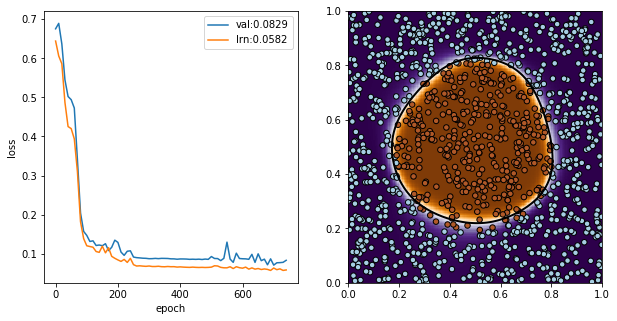

In [51]:

model.compile(loss = 'binary_crossentropy',
              #optimizer = SGD())                       # lr=0.01, momentum=0
              #optimizer = SGD(lr=1))
              optimizer = SGD(lr=0.5, momentum=0.8))              

plot_losses.reset = False
        
model.fit(x_lrn, y_lrn, validation_data=(x_val, y_val),
          batch_size = 100, epochs = 250,  verbose=0, 
          callbacks=[plot_losses])

In [ ]:
%%time
from   keras.optimizers import SGD, Adadelta, Adam, Adamax, Nadam
                                              # по умолч.:      
optimizers = [SGD     (lr=1, momentum=0.8),   # lr=0.01        
              Adadelta(lr=100),               # lr=1.0         
              Adam    (lr=0.1),               # lr=0.001        
              Adamax  (lr=0.1),               # lr=0.002
              Nadam   (lr=0.1)]               # lr=0.002

for op in optimizers:  
    model = Sequential()                        
    model.add(Dense(3, activation='sigmoid',  input_dim=2)) 
    model.add(Dense(1, activation='sigmoid'))   

    model.compile(loss  = 'binary_crossentropy', metrics = ['accuracy'],
                  optimizer = op)
    
    model.fit(x_lrn, y_lrn, validation_data=(x_val, y_val),
          batch_size=100, epochs=250,  verbose=0)
    
    score1 = model.evaluate(x_lrn, y_lrn, verbose=0)
    score2 = model.evaluate(x_val, y_val, verbose=0)
    print('loss: %.4f, val_loss: %.4f, acc: %.4f, val_acc: %.4f' 
          % (score1[0], score2[0], score1[1], score2[1]))    

# VGG

Visual Geometry Group, University of Oxford.<br>
Свёрточная сеть, обученная на базе ImageNet. <br>
Принимает на вход (<b>InputLayer</b>) 224 x 244 x 3  (RGB) и выдаёт (<b>predictions</b>) один из 1000 классов.<br>
It was used to win the ILSVR (ImageNet) competition in 2014.

## Грузим обученную сеть

In [52]:
from keras import applications
from keras.applications.vgg16 import preprocess_input, decode_predictions

model = applications.VGG16(weights='imagenet') # загружаем модель
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

<img src="nn_vgg16.png" width=600>


## Загружаем изображение и распознаём его

(224, 224, 3) -> (1, 224, 224, 3)


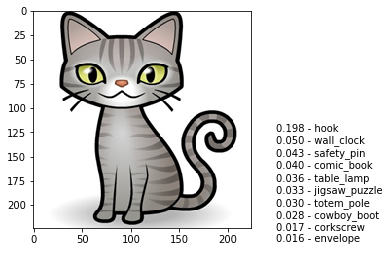

Wall time: 1.05 s


In [59]:
%%time
from keras.preprocessing import image

def show_result(fname):   
    img = image.load_img('z_Images/'+fname+".png", target_size = (224, 224) )      
    arr = image.img_to_array(img)            
    x   = np.expand_dims(arr, axis=0)
    print(arr.shape, "->", x.shape)
    
    x   = preprocess_input(x)
    res = model.predict(x)
    
    res = decode_predictions(res, top=10)[0]
    info = ""
    for r in res:
        if r[2] > 0.005:
            info += "%.3f - %s\n" % (r[2],r[1]) 

    plt.imshow(img, cmap='gray')                   
    plt.text(250, 250, info)
    plt.show()

files = ["woman0","woman1","cat2","dog1","plane1","ship1","cat8"]    
show_result(files[6])

(224, 224, 3) -> (1, 224, 224, 3)


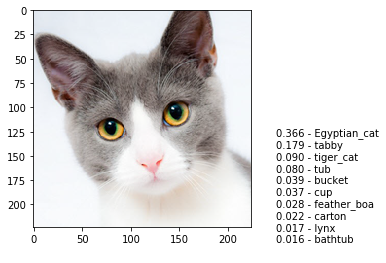

(224, 224, 3) -> (1, 224, 224, 3)


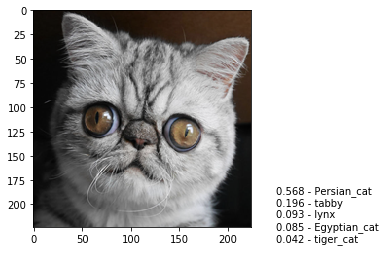

(224, 224, 3) -> (1, 224, 224, 3)


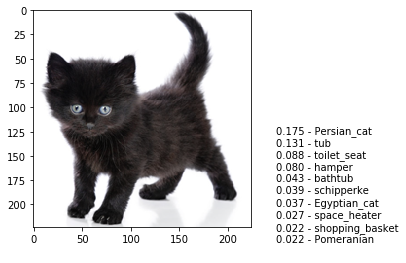

(224, 224, 3) -> (1, 224, 224, 3)


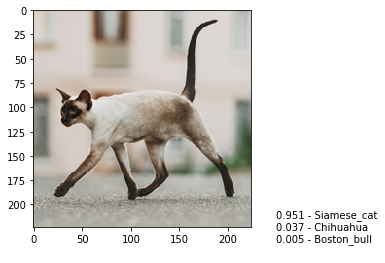

(224, 224, 3) -> (1, 224, 224, 3)


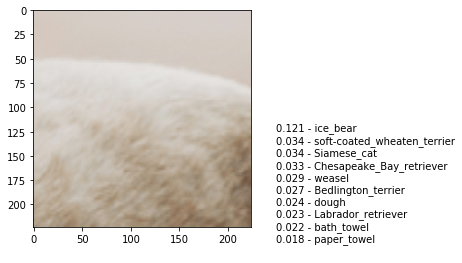

(224, 224, 3) -> (1, 224, 224, 3)


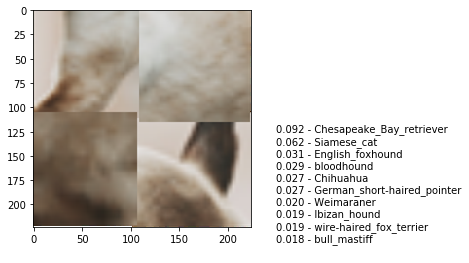

(224, 224, 3) -> (1, 224, 224, 3)


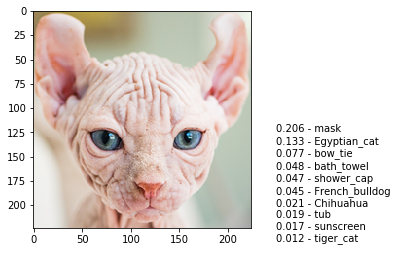

(224, 224, 3) -> (1, 224, 224, 3)


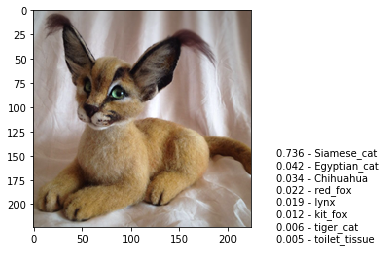

(224, 224, 3) -> (1, 224, 224, 3)


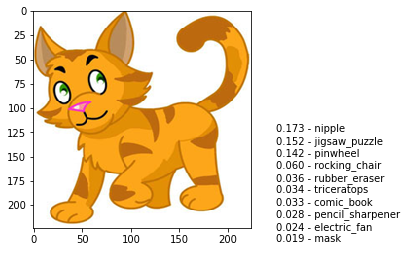

(224, 224, 3) -> (1, 224, 224, 3)


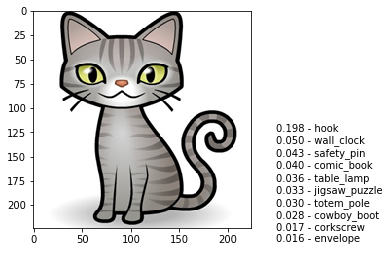

(224, 224, 3) -> (1, 224, 224, 3)


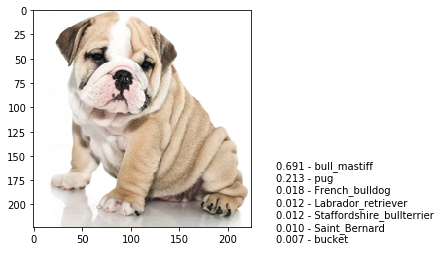

(224, 224, 3) -> (1, 224, 224, 3)


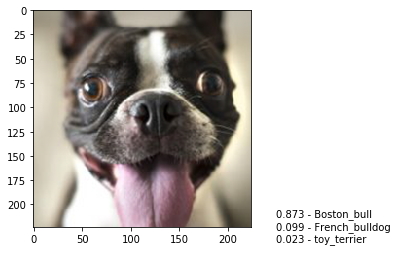

(224, 224, 3) -> (1, 224, 224, 3)


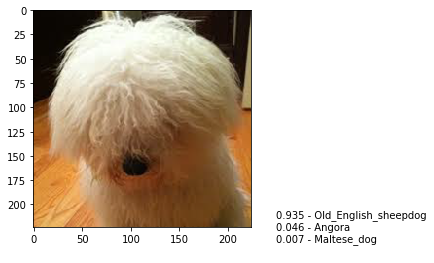

(224, 224, 3) -> (1, 224, 224, 3)


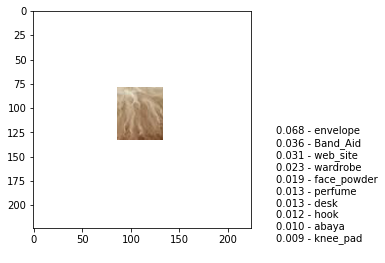

(224, 224, 3) -> (1, 224, 224, 3)


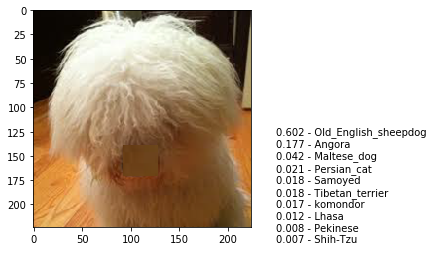

(224, 224, 3) -> (1, 224, 224, 3)


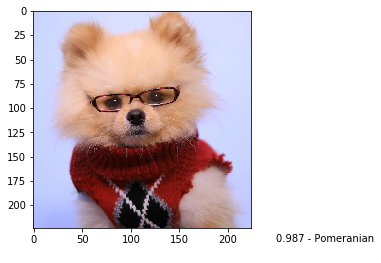

(224, 224, 3) -> (1, 224, 224, 3)


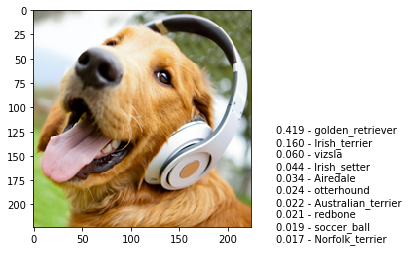

(224, 224, 3) -> (1, 224, 224, 3)


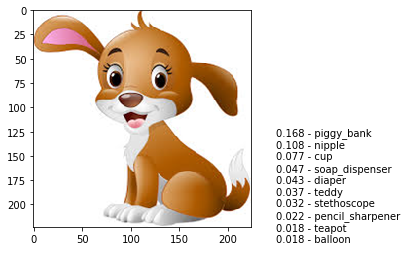

(224, 224, 3) -> (1, 224, 224, 3)


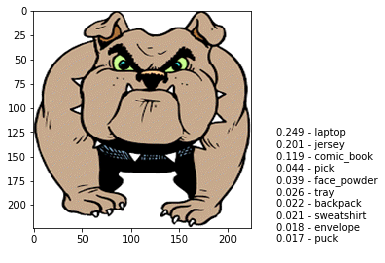

(224, 224, 3) -> (1, 224, 224, 3)


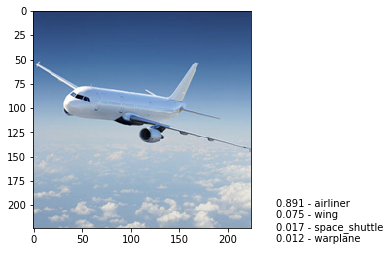

(224, 224, 3) -> (1, 224, 224, 3)


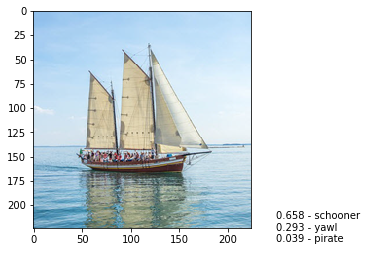

(224, 224, 3) -> (1, 224, 224, 3)


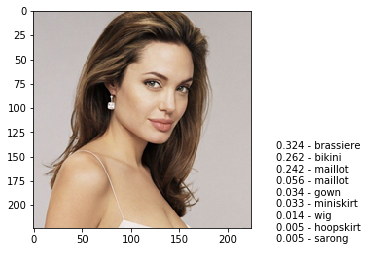

(224, 224, 3) -> (1, 224, 224, 3)


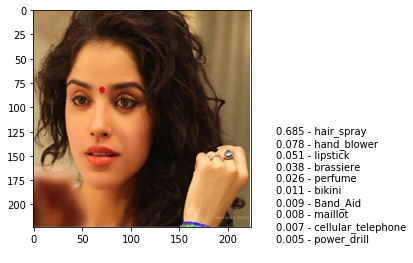

(224, 224, 3) -> (1, 224, 224, 3)


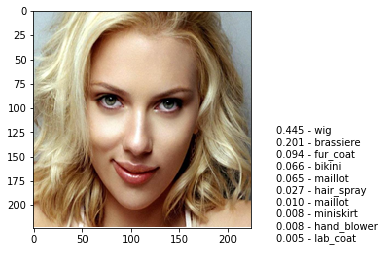

(224, 224, 3) -> (1, 224, 224, 3)


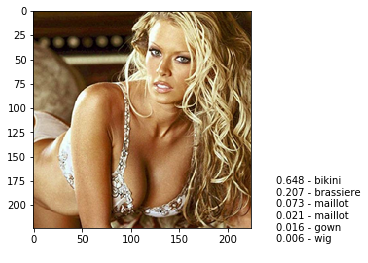

(224, 224, 3) -> (1, 224, 224, 3)


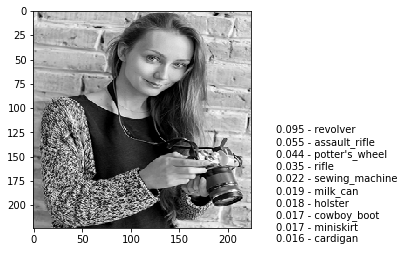

(224, 224, 3) -> (1, 224, 224, 3)


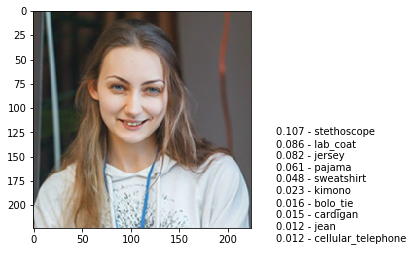

(224, 224, 3) -> (1, 224, 224, 3)


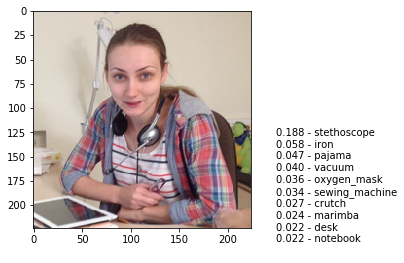

(224, 224, 3) -> (1, 224, 224, 3)


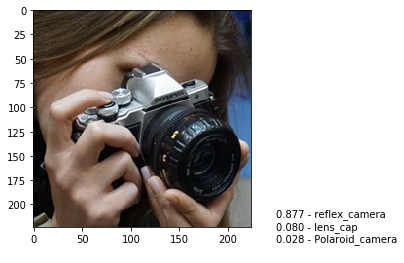

Wall time: 29.7 s


In [60]:
%%time
fnames = [
    "cat1","cat2","cat3","cat4","cat4a","cat4b","cat5","cat6","cat7","cat8",
    "dog1","dog2","dog3","dog3a","dog3b","dog4","dog5","dog6","dog7",
    "plane1",
    "ship1",
    "woman1", "woman2", "woman3", "woman4",
    "Dasha", "Dasha1","Dasha2","Dasha3"
         ]
for fname in fnames:
    show_result(fname)

# Задачи

* <b>Задача 1.</b> <i>Гипершар</i>: Класс занимает $n$-мерный шар в центре гиперкуба. Вокруг него (внутри куба) - второй класс. Сколько  минимум должно быть нейронов в скрытом слое? Обучить сеть для $n=3$. Какая проблема возникает при больших $n$?
* <b>Задача 2.</b> <i>Шахматная доска</i>: Пространство признаков - двумерный квадрат $[0...1]^2$. Оно разбито на чёрно-белые клетки 4x4. В белых клетках класс 0, в чёрных 1. Сколько скрытых слоёв должно быть в сети? Какое минимальное число нейронов в них? Обучить "минимальную" сеть и сеть с удвенным числом нейронов.


# Вспомогательные функции
## График ошибки и разделяющая поверхность
<a id="plot_losses"></a>

In [27]:
import numpy as np                       # работа с массивами
import matplotlib.pyplot as plt          # постороение графиков
import time                              # время вычислений

import keras

# Карта расстояний от плоскости, уровни линий, данные и опорные векторы
def plot(model, x, y, xMin=0, xMax=1, levels=[0.5]): 
    # сетка точек 201 x 201 в интервале x1,x2=[xMin,xMax]
    x1,x2 = np.meshgrid(np.linspace(xMin,xMax,201),np.linspace(xMin,xMax,201))
    grid  = np.c_[x1.ravel(), x2.ravel()]
    
    # Вычисляем в точках сетки расстояния до разделяющей плоскости:
    yp = model.predict(grid).reshape(x1.shape)
    
    #fig,ax = plt.subplots(figsize=(5, 5));    # размеры картинки (квадрат!)
    plt.axis([xMin, xMax, xMin, xMax])        # диапазон изменения осей

    plt.imshow(yp, interpolation='nearest',   # цвет. карту для 2D массива yp
                   extent=(x1.min(), x1.max(), x2.min(), x2.max()), 
                   aspect='auto', origin='lower', 
                   vmin=xMin, vmax=xMax, cmap=plt.cm.PuOr_r)

    plt.contour(x1,x2, yp, # линии yp = levels                
                levels=levels, linewidths=2, colors=['k', 'k', 'k'],   
                linestyles= ['--', '-', '--'] if len(levels)==3 else ['-'])
    plt.scatter(x[:,0], x[:,1], s=30, c=y, cmap=plt.cm.Paired,edgecolors='k')
            
#------------------------------------------------------------------------------    
# updatable plot
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    skip      = 10                               # число эпох между выводом графика
    reset     = True                             # очищать историю
    plot      = True                             # рисовать ли данные
    i         = 0
    
    def on_train_begin(self, logs={}):           # запустится один раз в начале
        if self.reset or self.i==0: 
            self.i = 0                           # номер точки
            self.x = []                          # значения x-ов графика
            self.losses = []                     # значения y-ков графика для train
            self.val_losses = []                 # значения y-ков графика для test
            self.fig = plt.figure()              
            self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.skip == 0:            
            self.logs.append(logs)
            self.x.append(self.i)
            self.losses.append    (logs.get('loss'))
            self.val_losses.append(logs.get('val_loss'))
            self.i += self.skip
        
            clear_output(wait=True)
            if self.plot:
                plt.subplots(1,2, figsize=(10, 5) )
                plt.subplot (1, 2, 1)
            else:
                plt.subplots(figsize=(15, 5))
            plt.plot(self.x, self.val_losses, label="val:{0:.4f}".format(self.val_losses[-1]) )
            plt.plot(self.x, self.losses,     label="lrn:{0:.4f}".format(self.losses[-1]) )            
            plt.ylabel('loss'); plt.xlabel('epoch')
            plt.legend()            
            if self.plot:
                plt.subplot(1, 2, 2);
                plot(model,x_dat,y_dat);
            plt.show();    

plot_losses = PlotLosses()    

## Загрузка файла на colab и отправка обратно на GoogleDisk

In [ ]:
!pip install -U -q PyDrive

def downloadFileGoogleDisck(fileName):  
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  # Authenticate and create the PyDrive client. This only needs to be done once per notebook.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
      
  fileList = drive.ListFile({'q': "title contains '" + fileName + "'"}).GetList()
  #pdb.set_trace()
  for file in fileList:
    fileDrive = drive.CreateFile({'id': file['id']})
    fileDrive.GetContentFile(file['title'])
    print('File ' + fileName + ' downloaded from Google Disc')

# res, src
def downloadFileToGoogleDrive(fileName, path):
  print('Start download file ' + path + ' to Google Drive with name ' + fileName)
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  # Authenticate and create the PyDrive client.
  # This only needs to be done once in a notebook.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Create & upload a text file.
  uploaded = drive.CreateFile({'title': fileName})
  uploaded.SetContentFile(path)
  uploaded.Upload()
  print('Uploaded file with ID {}'.format(uploaded.get('id')))

#downloadFileToGoogleDrive(fname, fname)  # переносим на Google Disk !!!!

In [ ]:
from graphviz import Digraph

g = Digraph()
g.body.append('size="3,3" rankdir="LR"')
g.attr('node', shape='point', color="green")
g.node('i1'); g.node('i2')
g.attr('node', shape='circle', color="lightblue2", style='filled')
g.edges([('i1', 'n1'), ('i1','n2'), ('i1', 'n3') ]) 
g.edges([('i2', 'n1'), ('i2','n2'), ('i2', 'n3') ])
g.edges([('n1', 'n4'), ('n2', 'n4'),('n3', 'n4') ])
g.attr('node', shape='none', size='0.1', color="blue", style='')
g.attr('edge',  color="green")
g.edge('n4','')
g